In [18]:
import pandas as pd
import numpy as np


In [19]:
m=pd.read_csv("matches.csv")
d=pd.read_csv("deliveries.csv")

In [20]:
m.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [21]:
m.shape

(756, 18)

In [22]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [23]:
d.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [24]:
d.shape

(179078, 21)

In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [26]:
#loggistic regeression ,svm algo shows probability
total_score=d.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()
#totalrun and batsman runs are different sometimes as no ball is not counted in batsman runs

C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\3947159026.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score=d.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()


In [27]:
total_score=total_score[total_score["inning"] ==1 ]#we only need for first innings as second id the team chasing

In [28]:
total_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [31]:
#now we will merge maches with total score ,as in matches we dont know total score  
mnew=m.merge(total_score[["match_id","total_runs"]],left_on="id",right_on="match_id")
#merge has attribute left id which specify what to add from left ||ly for right

In [32]:
mnew["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [33]:
#need to remove some teams and merge few team name

In [34]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [35]:
mnew['team1'] = mnew['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
mnew['team2'] = mnew['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

mnew['team1'] = mnew['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
mnew['team2'] = mnew['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
#replacing the name

In [36]:
mnew = mnew[mnew['team1'].isin(teams)]
mnew = mnew[mnew['team2'].isin(teams)]#keeping only those teams which are in teams list

In [38]:
mnew.shape

(641, 20)

In [39]:
mnew["dl_applied"].value_counts()#not needed the data where rain happened 

0    626
1     15
Name: dl_applied, dtype: int64

In [41]:
mnew=mnew[mnew["dl_applied"]==0]

In [42]:
mnew =mnew  [['match_id','city','winner','total_runs']]

In [43]:
dnew= mnew.merge(d,on='match_id')# on the basis of match id

In [44]:
dnew

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [45]:
dnew= dnew[dnew['inning'] == 2]

In [47]:
dnew.shape

(72413, 24)

In [48]:
# finding runs left and bowl left

In [49]:
dnew

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [50]:
#total_runs_y tell the  score of each ball individually

In [53]:
dnew['current_score'] = dnew.groupby('match_id').cumsum()['total_runs_y']# returns cumalative ie increasing sum of a row 

C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\3582616600.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dnew['current_score'] = dnew.groupby('match_id').cumsum()['total_runs_y']# returns cumalative ie increasing sum of a row
C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\3582616600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnew['current_score'] = dnew.groupby('match_id').cumsum()['total_runs_y']# returns cumalative ie increasing sum of a row


In [54]:
dnew

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [55]:
#now to get runs left after each ball we will subtract total_run_x from current score
dnew['runs_left'] = dnew['total_runs_x'] - dnew['current_score']

C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\2585890445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnew['runs_left'] = dnew['total_runs_x'] - dnew['current_score']


In [58]:
#balls left 
dnew['balls_left'] = 126 - (dnew['over']*6 + dnew['ball'])

C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\1841607401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnew['balls_left'] = 126 - (dnew['over']*6 + dnew['ball'])


In [59]:
dnew

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [60]:
#to know wicket left

In [62]:
dnew['player_dismissed'] = dnew['player_dismissed'].fillna("0")# fill nan with 0
dnew['player_dismissed'] = dnew['player_dismissed'].apply(lambda x:x if x == "0" else "1")# if it is not 0 make it 1 
dnew['player_dismissed'] = dnew['player_dismissed'].astype('int')#converting into integer
wickets = dnew.groupby('match_id').cumsum()['player_dismissed'].values#cumulative sum counting such as 1+1+1 for match id 
dnew['wickets'] = 10 - wickets
dnew.head()

C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\2924329242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnew['player_dismissed'] = dnew['player_dismissed'].fillna("0")# fill nan with 0
C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\2924329242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnew['player_dismissed'] = dnew['player_dismissed'].apply(lambda x:x if x == "0" else "1")# if it is not 0 make it 1
C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\2924329242.py:3: Set

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [64]:
dnew.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-5,0,3


In [65]:
#current run rate (crr)formula

In [67]:
# crr = runs/overs
dnew['crr'] = (dnew['current_score']*6)/(120 - dnew['balls_left'])
#as we need to 120-balls left divide by 6 instead of dividing i have multiply by 6

C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\496114858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnew['crr'] = (dnew['current_score']*6)/(120 - dnew['balls_left'])


In [68]:
#reqired run rate formula
dnew['rrr'] = (dnew['runs_left']*6)/dnew['balls_left']

C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\2080564252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnew['rrr'] = (dnew['runs_left']*6)/dnew['balls_left']


In [69]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [70]:
dnew['result'] = dnew.apply(result,axis=1)

C:\Users\Samyak Jain\AppData\Local\Temp\ipykernel_17520\1781858203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnew['result'] = dnew.apply(result,axis=1)


In [71]:
final_df = dnew[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [72]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [73]:
fdf = final_df.sample(final_df.shape[0])#for shuffling data

In [85]:
fdf.dropna(inplace=True)

In [91]:
#for some input has infinite value
fdf.describe()#rrr is infinite so to solve that we will remove the last ball where ball left is 0 as dividing by 0 was giving infinite 

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000
mean,92.621065,62.878725,7.553251,165.726963,7.447791,10.368308,0.526646
std,49.957572,33.259471,2.124334,29.294967,2.280498,13.726365,0.499293
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000,0.000000
25%,53.000000,35.000000,6.000000,147.000000,6.265782,7.151515,0.000000
50%,92.000000,64.000000,8.000000,165.000000,7.500000,8.880000,1.000000
75%,130.000000,92.000000,9.000000,185.000000,8.696385,10.894737,1.000000
max,249.000000,119.000000,10.000000,250.000000,42.000000,678.000000,1.000000


In [92]:
fdf = fdf[fdf['balls_left'] != 0]

In [93]:
fdf.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000
mean,92.621065,62.878725,7.553251,165.726963,7.447791,10.368308,0.526646
std,49.957572,33.259471,2.124334,29.294967,2.280498,13.726365,0.499293
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000,0.000000
25%,53.000000,35.000000,6.000000,147.000000,6.265782,7.151515,0.000000
50%,92.000000,64.000000,8.000000,165.000000,7.500000,8.880000,1.000000
75%,130.000000,92.000000,9.000000,185.000000,8.696385,10.894737,1.000000
max,249.000000,119.000000,10.000000,250.000000,42.000000,678.000000,1.000000


In [94]:
x = fdf.iloc[:,:-1] 
y = fdf.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)#randomized is used 

In [95]:
fdf

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
59973,Mumbai Indians,Deccan Chargers,Visakhapatnam,2,1,5,138,6.857143,12.000000,1
56824,Kings XI Punjab,Deccan Chargers,Dharamsala,162,90,8,198,7.200000,10.800000,0
11924,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,165,117,10,165,0.000000,8.461538,1
87283,Kings XI Punjab,Chennai Super Kings,Abu Dhabi,42,28,7,205,10.630435,9.000000,1
63231,Chennai Super Kings,Rajasthan Royals,Chennai,82,68,9,146,7.384615,7.235294,1
...,...,...,...,...,...,...,...,...,...,...
49403,Kings XI Punjab,Chennai Super Kings,Chandigarh,118,82,9,188,11.052632,8.634146,1
60410,Delhi Daredevils,Chennai Super Kings,Delhi,26,57,8,110,8.000000,2.736842,1
143385,Delhi Capitals,Mumbai Indians,Delhi,166,116,10,174,12.000000,8.586207,0
18470,Chennai Super Kings,Rajasthan Royals,Chennai,132,74,9,211,10.304348,10.702703,0


In [96]:
x_train#as there are three columns strings we need to apply one hot encoding

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
103076,Kolkata Knight Riders,Chennai Super Kings,Kolkata,151,105,10,165,5.600000,8.628571
80001,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,60,52,8,129,6.088235,6.923077
139314,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,172,101,9,210,12.000000,10.217822
2827,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,139,85,9,191,8.914286,9.811765
143885,Rajasthan Royals,Mumbai Indians,Jaipur,170,117,10,171,2.000000,8.717949
...,...,...,...,...,...,...,...,...,...
133948,Mumbai Indians,Delhi Daredevils,Delhi,121,74,8,186,8.478261,9.810811
93670,Rajasthan Royals,Sunrisers Hyderabad,Ahmedabad,93,80,6,134,6.150000,6.975000
111342,Rajasthan Royals,Chennai Super Kings,Chennai,109,73,8,157,6.127660,8.958904
19287,Rajasthan Royals,Mumbai Indians,Jaipur,14,5,5,145,6.834783,16.800000


In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')
#making pipeline 1st is transformation and 2 nd is model 

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [111]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))#RandomForestClassifier()
])#solver =liblinear is a library for largelinear classification

In [112]:
pipe.fit(x_train,y_train)

C:\Users\Samyak Jain\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [113]:
y_pred = pipe.predict(x_test)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)  #0.9984581960894247 after using Random forest but this will only give probability of chasing team 
#but to calculate probability of both teams we will use logistic regression

0.8015277875113883

In [118]:
pipe.predict_proba(x_test)[8]# telling probability it is not baised fully towards one team

array([0.52130045, 0.47869955])

In [119]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
#this code gives us wining and losing probability of each teams at every ball

In [121]:
temp_df,target = match_progression(dnew,74,pipe)
temp_df#model is done

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,56.3,43.7
10467,2,8,0,50.9,49.1
10473,3,1,0,57.6,42.4
10479,4,7,1,69.2,30.8
10485,5,12,0,59.2,40.8
10491,6,13,0,46.9,53.1
10497,7,9,0,41.1,58.9
10505,8,15,0,27.4,72.6
10511,9,7,0,25.3,74.7
10518,10,17,0,13.9,86.1


Text(0.5, 1.0, 'Target-178')

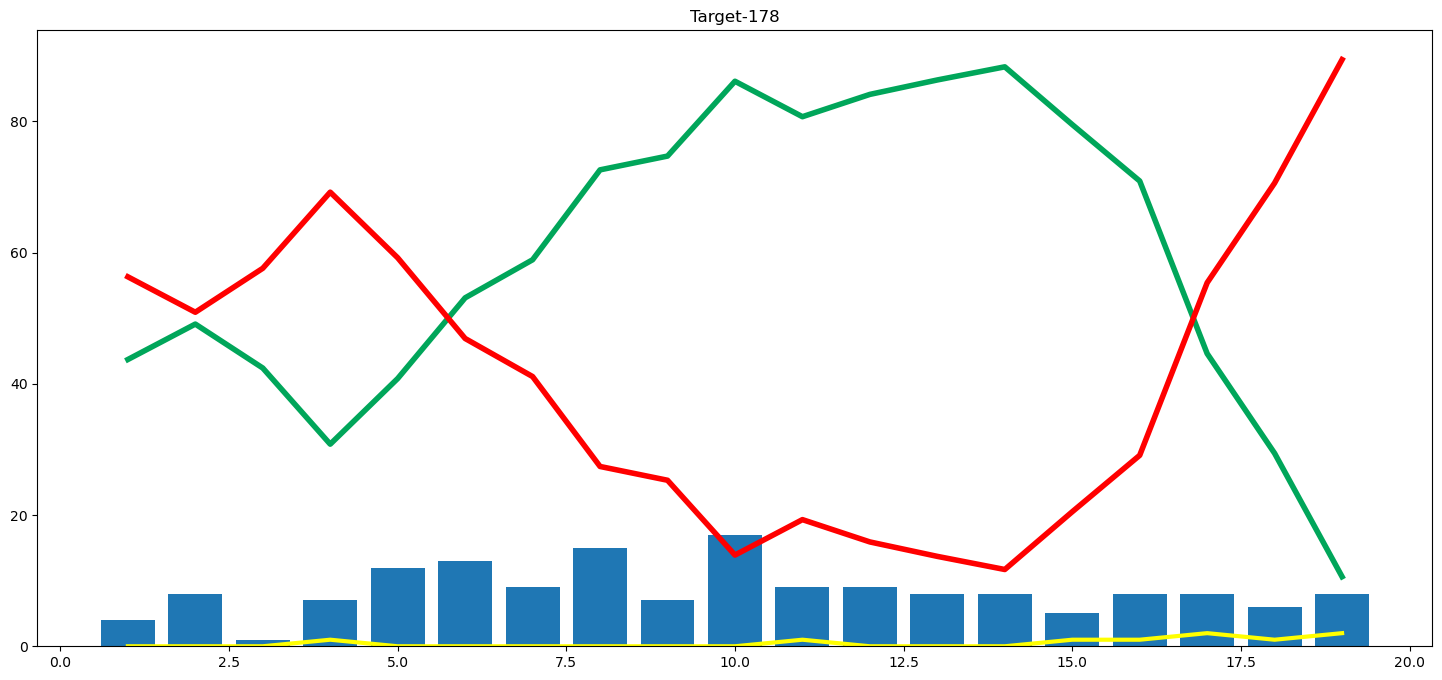

In [122]:
import matplotlib.pyplot as plt# map for plotting 
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)#wicket from yelow
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)#green for win
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)#red for lose
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])# bar for overs
plt.title('Target-' + str(target))

In [123]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [124]:
dnew['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [125]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))#for website